In [1]:
import QUANTAXIS as QA

jqdatasdk not installed


In [2]:

N = 40
mu = 1


In [3]:
import pandas as pd
def strategy001(data, N=40, mu=1):
    MP = QA.MA((data.high+data.low+data.close)/3, N)
    TR = pd.concat([abs(data.high - data.low), abs(data.high- data.close.shift(1)), abs(data.low - data.close.shift(1))],axis=1).max(axis=1)
    upBand = MP + mu*QA.MA(TR, N)
    dnBand = MP + mu*QA.MA(TR, 40)
    FP = MP
    return pd.DataFrame({'MP': MP, 'TR': TR, 'upBand': upBand, 'dnBand':dnBand, 'FP':MP})

# 灌入数据

In [9]:
data = QA.QA_fetch_stock_day_adv("000001", '2018-05-01', '2019-09-10')

In [10]:
data.data

,,open,high,low,close,volume,amount
date,code,,,,,,
2018-05-02,000001,10.97,11.03,10.80,10.88,1190523.0,1.295804e+09
2018-05-03,000001,10.86,10.88,10.57,10.75,1281355.0,1.372765e+09
2018-05-04,000001,10.73,10.83,10.66,10.68,710508.0,7.613020e+08
2018-05-07,000001,10.70,10.83,10.64,10.81,974308.0,1.046743e+09
2018-05-08,000001,10.83,11.15,10.80,11.01,1373305.0,1.511546e+09
...,...,...,...,...,...,...,...
2019-09-04,000001,14.32,14.50,14.31,14.44,973964.0,1.404037e+09
2019-09-05,000001,14.56,14.85,14.55,14.58,1768051.0,2.599478e+09
2019-09-06,000001,14.71,14.81,14.62,14.81,986432.0,1.451265e+09


In [11]:
ind = data.add_func(strategy001)

d:\ProgramData\Anaconda3\lib\site-packages\QUANTAXIS\QAData\base_datastruct.py:841: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  return self.data.groupby(


In [12]:
ind.tail(10)

,,MP,TR,upBand,dnBand,FP
date,code,,,,,
2019-08-28,000001,14.143583,0.26,14.511583,14.511583,14.143583
2019-08-29,000001,14.146083,0.19,14.508833,14.508833,14.146083
2019-08-30,000001,14.154917,0.29,14.517417,14.517417,14.154917
2019-09-02,000001,14.172750,0.39,14.533250,14.533250,14.172750
2019-09-03,000001,14.192083,0.26,14.552333,14.552333,14.192083
2019-09-04,000001,14.212917,0.20,14.572917,14.572917,14.212917
2019-09-05,000001,14.239000,0.41,14.603000,14.603000,14.239000
2019-09-06,000001,14.258250,0.23,14.610750,14.610750,14.258250
2019-09-09,000001,14.277667,0.40,14.633167,14.633167,14.277667


# 实现策略

In [13]:
MPDIFF = ind.MP.diff().dropna()

In [ ]:
# 在测试阶段, 我们只需要写个伪回测代码即可

In [14]:
lastprice = 0

for idx, item in data.iterrows():
    try:
        if MPDIFF.loc[idx]>0 and item['close']> ind.upBand.loc[idx]:
            print('buyOPEN _ {}'.format(idx))
        if MPDIFF.loc[idx]<0 and item['close']< ind.upBand.loc[idx]:
            print('sellOPEN_ {}'.format(idx))
        if lastprice< ind.FP.loc[idx] and item['close']> ind.FP.loc[idx]:
            print('close')
        if lastprice> ind.FP.loc[idx] and item['close']< ind.FP.loc[idx]:
            print('close')
    except:
        pass
    lastprice = item['close']

sellOPEN_ (Timestamp('2018-06-28 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-06-29 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-02 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-03 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-04 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-05 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-06 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-09 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-10 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-11 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-12 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-13 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-16 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-17 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-18 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-19 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-20 00:00:00'), '000001')
sellOPEN_ (Timestamp('2018-07-23 00:00:00'), '000001')
sellOPEN_ 

In [15]:
user = QA.QA_User(username='quantaxiss', password='quantaxis')
portfolio = user.new_portfolio('strategy101')

In [29]:
acc.hold_available.get('2018-05-03 00:00:00',0)

0

In [30]:
ac_hold = acc.hold_available

In [ ]:
ac_hold.

In [25]:
data.index[1]

(Timestamp('2018-05-03 00:00:00'), '000001')

In [16]:
# acc = portfolio.new_account(account_cookie='acc001', init_hold={'000001':0}, init_cash=30000, market_type=QA.MARKET_TYPE.STOCK_CN)
acc = portfolio.new_account(account_cookie='acc001', init_hold={'RBL8':0}, init_cash=30000, market_type=QA.MARKET_TYPE.FUTURE_CN)
lastprice = 0

for idx, item in data.iterrows():
    try:
        if acc.hold_available.get(idx[1],0) ==0 and MPDIFF.loc[idx]>0 and item['close']> ind.upBand.loc[idx]:
            print('buyOPEN _ {}'.format(idx))
            acc.receive_simpledeal(
                code= idx[1],
                trade_price = item['close'],
                trade_amount = 1,
                trade_towards= QA.ORDER_DIRECTION.BUY_OPEN,
                trade_time= idx[0])
        if acc.hold_available.get(idx[1],0) ==0 and MPDIFF.loc[idx]<0 and item['close']< ind.upBand.loc[idx]:
            print('sellOPEN_ {}'.format(idx))
            acc.receive_simpledeal(
                code= idx[1],
                trade_price = item['close'],
                trade_amount = 1,
                trade_towards= QA.ORDER_DIRECTION.SELL_OPEN,
                trade_time= idx[0])
        if lastprice< ind.FP.loc[idx] and item['close']> ind.FP.loc[idx]:
            print('close')
            if acc.hold_available.get(idx[1],0)>0:
                #多单止盈
                acc.receive_simpledeal(
                    code= idx[1],
                    trade_price = item['close'],
                    trade_amount = 1,
                    trade_towards= QA.ORDER_DIRECTION.SELL_CLOSE,
                    trade_time= idx[0])
            elif acc.hold_available.get(idx[1],0)<0:
                # 空单止损
                acc.receive_simpledeal(
                    code= idx[1],
                    trade_price = item['close'],
                    trade_amount = 1,
                    trade_towards= QA.ORDER_DIRECTION.BUY_CLOSE,
                    trade_time= idx[0])
                
        if lastprice> ind.FP.loc[idx] and item['close']< ind.FP.loc[idx]:
            print('close')
            if acc.hold_available.get(idx[1],0)>0:
                #多单止损
                acc.receive_simpledeal(
                    code= idx[1],
                    trade_price = item['close'],
                    trade_amount = 1,
                    trade_towards= QA.ORDER_DIRECTION.SELL_CLOSE,
                    trade_time= idx[0])
            elif acc.hold_available.get(idx[1],0)<0:
                # 空单止盈
                acc.receive_simpledeal(
                    code= idx[1],
                    trade_price = item['close'],
                    trade_amount = 1,
                    trade_towards= QA.ORDER_DIRECTION.BUY_CLOSE,
                    trade_time= idx[0])
    except:
        pass
    lastprice = item['close']

QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
sellOPEN_ (Timestamp('2018-06-28 00:00:00'), '000001')
close
sellOPEN_ (Timestamp('2018-07-31 00:00:00'), '000001')
close
sellOPEN_ (Timestamp('2018-08-02 00:00:00'), '000001')
close
sellOPEN_ (Timestamp('2018-08-10 00:00:00'), '000001')
close
sellOPEN_ (Timestamp('2018-08-14 00:00:00'), '000001')
close
sellOPEN_ (Timestamp('2018-08-21 00:00:00'), '000001')
close
buyOPEN _ (Timestamp('2018-10-12 00:00:00'), '000001')
close
buyOPEN _ (Timestamp('2018-10-16 00:00:00'), '000001')
close
buyOPEN _ (Timestamp('2018-10-22 00:00:00'), '000001')
close
close
close
close
sellOPEN_ (Timestamp('2018-11-26 00:00:00'), '000001')
close
sellOPEN_ (Timestamp('2019-01-11 00:00:00'), '000001')
close
sellOPEN_ (Timestamp('2019-05-07 00:00:00'), '000001')
close
buyOPEN _ (Timestamp('2019-07-01 00:00:00'), '000001')
close
b

In [17]:
acc.history_table


,datetime,code,price,amount,cash,order_id,realorder_id,trade_id,account_cookie,commission,tax,message,frozen,direction,total_frozen
0,2018-06-28 00:00:00,000001,8.92,-1.0,29991.07108,None,None,None,acc001,0.00892,0,None,8.92,-2,8.92
1,2018-07-30 00:00:00,000001,9.39,1.0,29999.51169,None,None,None,acc001,0.00939,0,None,0.00,3,0.00
2,2018-07-31 00:00:00,000001,9.42,-1.0,29990.08227,None,None,None,acc001,0.00942,0,None,9.42,-2,9.42
3,2018-08-01 00:00:00,000001,9.15,1.0,29999.76312,None,None,None,acc001,0.00915,0,None,0.00,3,0.00
4,2018-08-02 00:00:00,000001,8.94,-1.0,29990.81418,None,None,None,acc001,0.00894,0,None,8.94,-2,8.94
5,2018-08-09 00:00:00,000001,9.29,1.0,29999.39489,None,None,None,acc001,0.00929,0,None,0.00,3,0.00
6,2018-08-10 00:00:00,000001,9.23,-1.0,29990.15566,None,None,None,acc001,0.00923,0,None,9.23,-2,9.23
7,2018-08-13 00:00:00,000001,9.05,1.0,29999.55661,None,None,None,acc001,0.00905,0,None,0.00,3,0.00
8,2018-08-14 00:00:00,000001,9.00,-1.0,29990.54761,None,None,None,acc001,0.00900,0,None,9.00,-2,9.00
9,2018-08-20 00:00:00,000001,9.00,1.0,29999.53861,None,None,None,acc001,0.00900,0,None,0.00,3,0.00


In [18]:
performance = QA.QA_Performance(acc)

In [19]:
performance.pnl_fifo

,sell_date,buy_date,amount,sell_price,buy_price,rawdirection,unit,pnl_ratio,pnl_money,hold_gap,if_buyopen,openprice,opendate,closeprice,closedate
code,,,,,,,,,,,,,,,
000001,2018-06-28,2018-07-30,1.0,8.92,9.39,sell,1.0,-0.050053,-0.47,32 days,False,8.92,2018-06-28 00:00:00,9.39,2018-07-30 00:00:00
000001,2018-07-31,2018-08-01,1.0,9.42,9.15,sell,1.0,0.029508,0.27,1 days,False,9.42,2018-07-31 00:00:00,9.15,2018-08-01 00:00:00
000001,2018-08-02,2018-08-09,1.0,8.94,9.29,sell,1.0,-0.037675,-0.35,7 days,False,8.94,2018-08-02 00:00:00,9.29,2018-08-09 00:00:00
000001,2018-08-10,2018-08-13,1.0,9.23,9.05,sell,1.0,0.019890,0.18,3 days,False,9.23,2018-08-10 00:00:00,9.05,2018-08-13 00:00:00
000001,2018-08-14,2018-08-20,1.0,9.00,9.00,sell,1.0,0.000000,0.00,6 days,False,9.00,2018-08-14 00:00:00,9.00,2018-08-20 00:00:00
000001,2018-08-21,2018-10-11,1.0,9.23,9.86,sell,1.0,-0.063895,-0.63,51 days,False,9.23,2018-08-21 00:00:00,9.86,2018-10-11 00:00:00
000001,2018-10-12,2018-10-12,1.0,10.30,10.30,buy,1.0,0.000000,0.00,0 days,True,10.30,2018-10-12 00:00:00,10.30,2018-10-12 00:00:00
000001,2018-10-19,2018-10-16,1.0,10.76,10.37,buy,1.0,0.037608,0.39,3 days,True,10.37,2018-10-16 00:00:00,10.76,2018-10-19 00:00:00
000001,2018-11-15,2018-10-22,1.0,10.62,11.15,buy,1.0,-0.047534,-0.53,24 days,True,11.15,2018-10-22 00:00:00,10.62,2018-11-15 00:00:00


In [20]:
acc.market_type

'future_cn'

In [21]:
risk = QA.QA_Risk(acc)


margin!


<AxesSubplot:xlabel='date'>

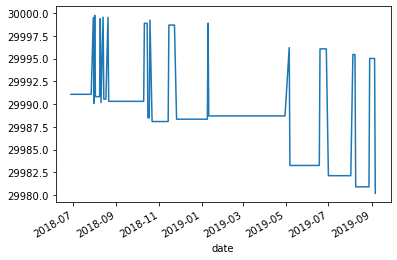

In [22]:
# 用市价计算的每日总资产
(risk.daily_market_value+ acc.daily_cash.cash).plot()

<AxesSubplot:xlabel='date'>

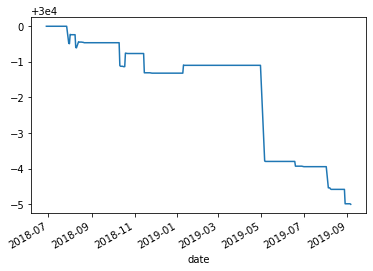

In [23]:
# 用冻结保证金计算的总资产

(acc.daily_frozen+ acc.daily_cash.cash).plot()

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

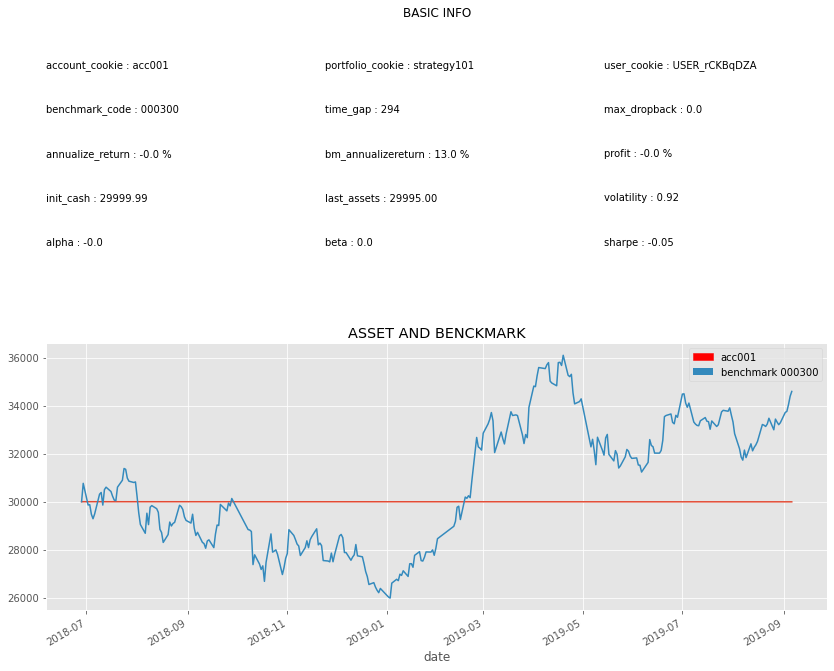

In [24]:
risk.plot_assets_curve()

In [ ]:
risk.save()
acc.save()